# Data Input

In [2]:
os.chdir(f'G:\Sanit_Horizontal\Data Analysis\Dharin Project files\Friction Measurement Issues\{50}N regressed model')

In [3]:
lst = ['3kmph','4kmph','5kmph','6kmph','7kmph','8kmph','9kmph']

In [4]:
temp = np.arange(30,105,0.5)

In [5]:
import pickle
from sklearn.preprocessing import PolynomialFeatures

In [6]:
d ={}

for key in lst:
    
    d[key] = {}

# Unpickling the model

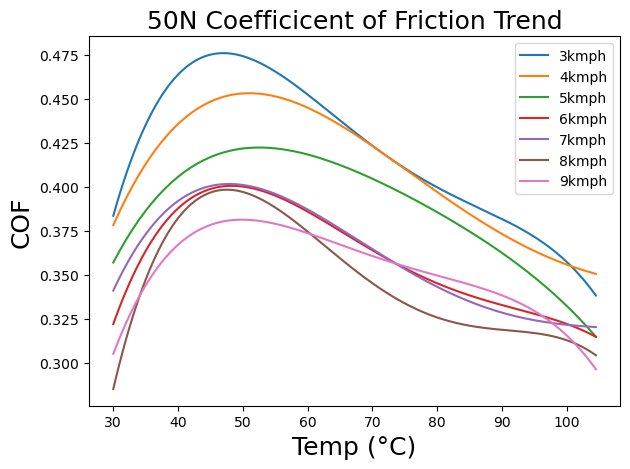

In [7]:
for i in np.arange(0,len(lst),1):
    
    str = lst[i]
    
    # Calling the trained model
    
    with open(f'50N_{str}_fit_model.pkl','rb') as file:
        
        regs = pickle.load(file)
    
    deg = 4
    poly = PolynomialFeatures(degree = deg, include_bias =  False)
    poly_features = poly.fit_transform(temp.reshape(-1,1))
    
    mu_pred = regs.predict(poly_features)
    
    # Plotting Function
    plt.plot(temp,mu_pred)
    
    d[lst[i]]['temperature'] = temp
    d[lst[i]]['mu'] = mu_pred
    
    
plt.legend(lst)    
plt.xlabel('Temp (°C)',size = 18)
plt.ylabel('COF',size = 18)
plt.title('50N Coefficicent of Friction Trend',size = 18)
plt.tight_layout()

In [8]:
tmp  = np.arange(30,105,5)

In [9]:
d2 = {}

for key in tmp:
    
    d2[key] = {}

In [10]:
for j in np.arange(0,len(tmp),1):
    
#     print(tmp[j])

    mu = []
    v = []

    for i in np.arange(0,len(lst),1):

        str = lst[i]

        # Calling the trained model

        with open(f'50N_{str}_fit_model.pkl','rb') as file:

            regs = pickle.load(file)

        deg = 4
        poly = PolynomialFeatures(degree = deg, include_bias =  False)
        poly_features = poly.fit_transform(tmp[j].reshape(-1,1))

        mu_pred = regs.predict(poly_features)
        mu.append(mu_pred[0])
        v.append(int(lst[i][0]))
#         print(mu_pred)

    d2[tmp[j]]['vel'] = v
    d2[tmp[j]]['mu'] = mu
        

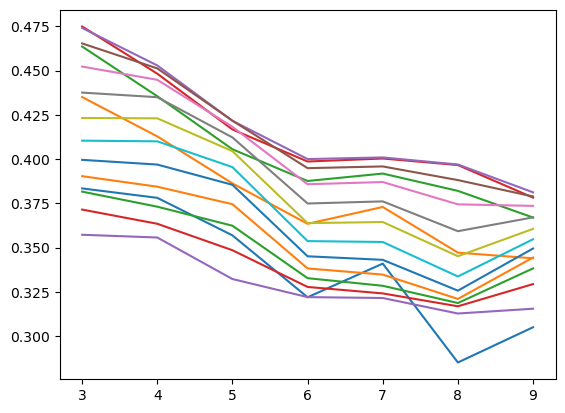

In [11]:
for i in np.arange(0,len(tmp),1):
    
#     print(d2[tmp[i]]['vel'])
#     print(d2[tmp[i]]['mu'])
    plt.plot(d2[tmp[i]]['vel'],d2[tmp[i]]['mu'])


# plt.legend(tmp)    
plt.show()

# ISO plots : Velocity

In [12]:
vel = [3,4,5,6,7,8,9]

In [ ]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# for creating a responsive plot
%matplotlib widget

pl.figure()

ax = pl.subplot(projection='3d')

for i in np.arange(0,len(d),1):
    
    ax.plot(temp,np.ones(temp.size)*vel[i],d[lst[i]]['mu'])
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Velocity (kmph)')
    ax.set_zlabel('COF')
   
    
pl.tight_layout()
pl.show()
    

In [ ]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# for creating a responsive plot
%matplotlib widget

pl.figure()

ax = pl.subplot(projection='3d')

for i in np.arange(0,len(d2),1):
    
    ax.plot(np.ones(len(vel))*tmp[i],vel,d2[tmp[i]]['mu'])
    
    
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Velocity (kmph)')
    ax.set_zlabel('COF')
   
    
pl.tight_layout()
pl.show()
    

In [ ]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# for creating a responsive plot
%matplotlib widget

pl.figure()

ax = pl.subplot(projection='3d')

for i in np.arange(0,len(d),1):
    
    ax.plot(temp,np.ones(temp.size)*vel[i],d[lst[i]]['mu'], color = "blue")
    
for i in np.arange(0,len(d2),1):
    
    ax.plot(np.ones(len(vel))*tmp[i],vel,d2[tmp[i]]['mu'], color = "blue")
    
    
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Velocity (kmph)')
    ax.set_zlabel('COF')
   

    
pl.tight_layout()
pl.show()
    

In [ ]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation

# for creating a responsive plot
%matplotlib widget

fig = pl.figure()

ax = pl.subplot(projection='3d')

for i in np.arange(0,len(d),1):
    
    ax.plot(temp,np.ones(temp.size)*vel[i],d[lst[i]]['mu'], color = "blue")
    
for i in np.arange(0,len(d2),1):
    
    ax.plot(np.ones(len(vel))*tmp[i],vel,d2[tmp[i]]['mu'], color = "blue")
    
    
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Velocity (kmph)')
    ax.set_zlabel('COF')
   
    
pl.tight_layout()

def rotate(angle):
    ax.view_init(azim=angle)

print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('rotation.gif', dpi=80, writer='imagemagick')
    

# Generating Regression Model for the 3D contour data

In [13]:
arr1 = np.zeros((0,3))
arr2 = np.zeros((7,3))

In [14]:
for i in np.arange(0,len(d2),1):
    
    for j in np.arange(0,len(vel),1):
        
        
        # Temperature
        arr2[j][1] = list(d2.keys())[i]
        
        # Velocity
        arr2[j][0] = d2[list(d2.keys())[i]]['vel'][j]
        
        # Coefficient of Friction
        arr2[j][2] = d2[list(d2.keys())[i]]['mu'][j]

    arr1 = np.append(arr1,arr2, axis = 0)

In [15]:
arr2 = np.zeros((len(d[list(d.keys())[0]]['temperature']),3))

In [16]:
for i in np.arange(0,len(d),1):
# for i in np.arange(0,1,1):
    
    
    for j in np.arange(0,len(d[list(d.keys())[0]]['temperature']),1):

        
        # Velocity
        arr2[j][0] = int(list(d.keys())[i][0])
        
        # Temperature
        arr2[j][1] = d[list(d.keys())[i]]['temperature'][j]
        
        # Coefficient of Friction
        arr2[j][2] = d[list(d.keys())[i]]['mu'][j]
        
    arr1 = np.append(arr1,arr2, axis = 0)
           

In [17]:
arr1

array([[  3.        ,  30.        ,   0.3834088 ],
       [  4.        ,  30.        ,   0.37808785],
       [  5.        ,  30.        ,   0.3568577 ],
       ...,
       [  9.        , 103.5       ,   0.30115868],
       [  9.        , 104.        ,   0.29874112],
       [  9.        , 104.5       ,   0.29621769]])

In [18]:
data = pd.DataFrame(arr1, columns = ['vel','temp','mu'])

In [19]:
data.sort_values(by = ['mu'], inplace = True)

In [20]:
data.reset_index(drop = True, inplace = True)

In [21]:
data.head()

,vel,temp,mu
0,8.0,30.0,0.285025
1,8.0,30.0,0.285025
2,8.0,30.5,0.292673
3,9.0,104.5,0.296218
4,9.0,104.0,0.298741


In [22]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,vel,temp,mu
vel,1.000000,-0.000000,-0.620164
temp,-0.000000,1.000000,-0.529879
mu,-0.620164,-0.529879,1.000000


In [23]:
import seaborn as sns

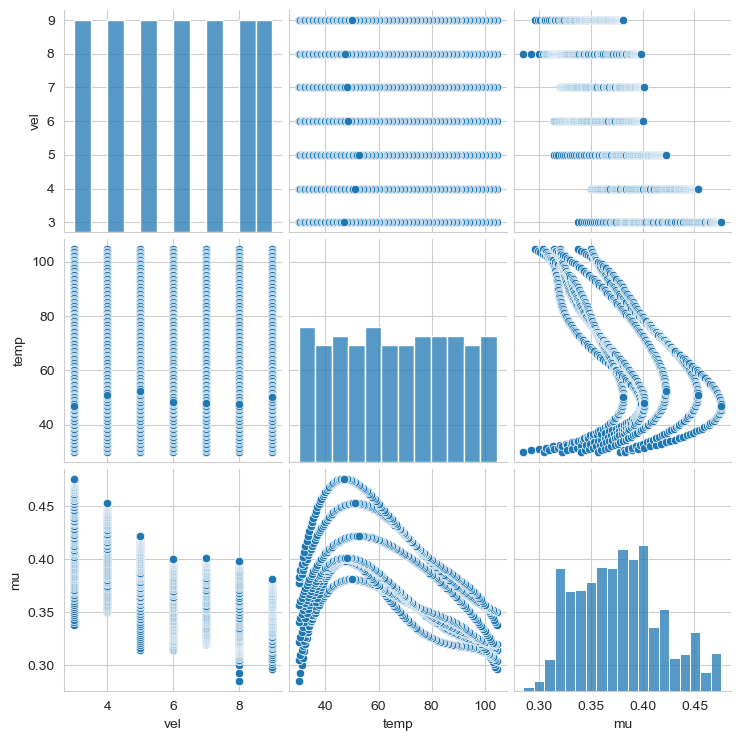

In [24]:
sns.set_style("whitegrid");
sns.pairplot(data);
plt.show()

# Multivariate Regression

In [25]:
# sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [26]:
x_values = data[['vel','temp']].values
y_values = data['mu'].values

In [27]:
# Polynomial Degree

deg = 4

In [28]:
poly_model = PolynomialFeatures(degree = deg)

In [29]:
poly_x_values = poly_model.fit_transform(x_values)
poly_model.fit(poly_x_values, y_values)


PolynomialFeatures(degree=4)

In [30]:
# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, y_values)

LinearRegression()

In [31]:
y_pred = regression_model.predict(poly_x_values)

In [32]:
regression_model.coef_

# mean_squared_error(y_values, y_pred, squared=False)

array([ 0.00000000e+00,  9.38562483e-02,  5.53738291e-02, -3.93661992e-02,
        1.40712735e-03, -1.19516299e-03,  5.70002855e-03, -3.59515604e-04,
        8.69356685e-06,  1.01468802e-05, -2.79855932e-04,  2.39644597e-05,
       -5.83069886e-07,  2.14206112e-09, -3.24961811e-08])

In [33]:
r2_score(y_pred,y_values)

0.9729884952972999

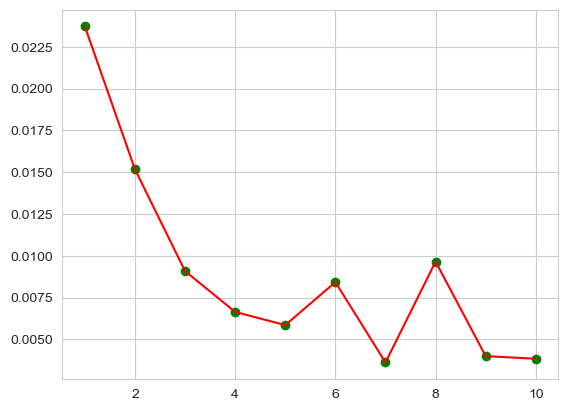

In [34]:

# check our accuracy for each degree, the lower the error the better!
number_degrees = [1,2,3,4,5,6,7,8,9,10]
plt_mean_squared_error = []

for degree in number_degrees:

    poly_model = PolynomialFeatures(degree=degree)
  
    poly_x_values = poly_model.fit_transform(x_values)
    poly_model.fit(poly_x_values, y_values)
  
    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_values)
    y_pred = regression_model.predict(poly_x_values)
  
    plt_mean_squared_error.append(mean_squared_error(y_values, y_pred, squared=False))
  
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red") 
plt.show()
 

# 3D contour plot

In [35]:
from mpl_toolkits.mplot3d import axes3d

x = np.arange(3,9,0.1)
y = np.arange(30,100,0.5)


In [36]:
x

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1,
       8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9])

In [37]:
y

array([30. , 30.5, 31. , 31.5, 32. , 32.5, 33. , 33.5, 34. , 34.5, 35. ,
       35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5, 39. , 39.5, 40. , 40.5,
       41. , 41.5, 42. , 42.5, 43. , 43.5, 44. , 44.5, 45. , 45.5, 46. ,
       46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5, 50. , 50.5, 51. , 51.5,
       52. , 52.5, 53. , 53.5, 54. , 54.5, 55. , 55.5, 56. , 56.5, 57. ,
       57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5, 61. , 61.5, 62. , 62.5,
       63. , 63.5, 64. , 64.5, 65. , 65.5, 66. , 66.5, 67. , 67.5, 68. ,
       68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5, 72. , 72.5, 73. , 73.5,
       74. , 74.5, 75. , 75.5, 76. , 76.5, 77. , 77.5, 78. , 78.5, 79. ,
       79.5, 80. , 80.5, 81. , 81.5, 82. , 82.5, 83. , 83.5, 84. , 84.5,
       85. , 85.5, 86. , 86.5, 87. , 87.5, 88. , 88.5, 89. , 89.5, 90. ,
       90.5, 91. , 91.5, 92. , 92.5, 93. , 93.5, 94. , 94.5, 95. , 95.5,
       96. , 96.5, 97. , 97.5, 98. , 98.5, 99. , 99.5])

In [38]:
mu_pred = []

In [39]:
x_val = np.stack((np.ones(len(y))*x[0],y), axis = 1)

poly_x_values = poly_model.fit_transform(x_val)
mu_pred = regression_model.predict(poly_x_values)

In [40]:
mu_pred

array([0.4022657 , 0.40521599, 0.40818715, 0.4111723 , 0.41416444,
       0.41715645, 0.42014115, 0.42311133, 0.42605976, 0.42897923,
       0.43186256, 0.43470269, 0.43749261, 0.44022549, 0.44289464,
       0.44549355, 0.44801594, 0.45045575, 0.45280721, 0.4550648 ,
       0.45722332, 0.4592779 , 0.46122401, 0.46305747, 0.4647745 ,
       0.46637169, 0.46784603, 0.46919493, 0.47041622, 0.47150816,
       0.47246944, 0.47329918, 0.47399695, 0.47456274, 0.474997  ,
       0.47530057, 0.47547475, 0.47552124, 0.47544216, 0.47524   ,
       0.47491766, 0.47447839, 0.47392579, 0.4732638 , 0.47249668,
       0.47162898, 0.47066551, 0.46961134, 0.46847177, 0.46725229,
       0.46595856, 0.46459641, 0.46317175, 0.46169061, 0.46015909,
       0.4585833 , 0.45696937, 0.4553234 , 0.45365143, 0.45195944,
       0.45025329, 0.44853869, 0.44682119, 0.44510617, 0.44339877,
       0.44170389, 0.44002618, 0.43836998, 0.43673935, 0.435138  ,
       0.43356931, 0.4320363 , 0.43054161, 0.4290875 , 0.42767

In [41]:
for i in np.arange(1,len(x),1):
    
#     print(x[i])
    
    x_val = np.stack((np.ones(len(y))*x[i],y), axis = 1)

    poly_x_values = poly_model.fit_transform(x_val)
    dum = regression_model.predict(poly_x_values)
#     print(dum)


    mu_pred = np.vstack([mu_pred, dum])   

In [ ]:
mu_pred

In [ ]:
np.size(x)

In [ ]:
np.size(y)

In [ ]:
np.size(mu_pred)

In [ ]:
from matplotlib import cm


# for creating a responsive plot
%matplotlib widget


fig = plt.figure()
ax = plt.axes(projection='3d')
cont = ax.contour3D(x, y, mu_pred.T, 50, cmap= 'viridis')
# ax.plot_surface(x, y, mu_pred.T,cmap='viridis', edgecolor='none')
ax.set_xlabel('Velocity (kmph)')
ax.set_ylabel('Temperature (°C)')
ax.set_zlabel('COF')
ax.set_title('Coefficient of Friction Contour')
# Add a color bar which maps values to colors.
fig.colorbar(cont, shrink=0.5, aspect=5)

plt.show()

In [42]:
xx = np.arange(8.5,3,-0.01)

In [43]:
xx

array([8.5 , 8.49, 8.48, 8.47, 8.46, 8.45, 8.44, 8.43, 8.42, 8.41, 8.4 ,
       8.39, 8.38, 8.37, 8.36, 8.35, 8.34, 8.33, 8.32, 8.31, 8.3 , 8.29,
       8.28, 8.27, 8.26, 8.25, 8.24, 8.23, 8.22, 8.21, 8.2 , 8.19, 8.18,
       8.17, 8.16, 8.15, 8.14, 8.13, 8.12, 8.11, 8.1 , 8.09, 8.08, 8.07,
       8.06, 8.05, 8.04, 8.03, 8.02, 8.01, 8.  , 7.99, 7.98, 7.97, 7.96,
       7.95, 7.94, 7.93, 7.92, 7.91, 7.9 , 7.89, 7.88, 7.87, 7.86, 7.85,
       7.84, 7.83, 7.82, 7.81, 7.8 , 7.79, 7.78, 7.77, 7.76, 7.75, 7.74,
       7.73, 7.72, 7.71, 7.7 , 7.69, 7.68, 7.67, 7.66, 7.65, 7.64, 7.63,
       7.62, 7.61, 7.6 , 7.59, 7.58, 7.57, 7.56, 7.55, 7.54, 7.53, 7.52,
       7.51, 7.5 , 7.49, 7.48, 7.47, 7.46, 7.45, 7.44, 7.43, 7.42, 7.41,
       7.4 , 7.39, 7.38, 7.37, 7.36, 7.35, 7.34, 7.33, 7.32, 7.31, 7.3 ,
       7.29, 7.28, 7.27, 7.26, 7.25, 7.24, 7.23, 7.22, 7.21, 7.2 , 7.19,
       7.18, 7.17, 7.16, 7.15, 7.14, 7.13, 7.12, 7.11, 7.1 , 7.09, 7.08,
       7.07, 7.06, 7.05, 7.04, 7.03, 7.02, 7.01, 7.

In [44]:
yy = np.linspace(30,50,len(xx))

In [45]:
yy1 = np.linspace(30,60,len(xx))

In [46]:
yy2= np.linspace(50,70,len(xx))

In [47]:
yy3 = np.linspace(50,80,len(xx))

In [81]:
yy4 = np.linspace(70,90,len(xx))

In [82]:
yy5 = np.linspace(70,100,len(xx))

In [83]:
mu_1 = []
mu_2 = []
mu_3 = []
mu_4 = []
mu_5 = []
mu_6 = []

In [84]:
x_val = np.stack((xx,yy), axis = 1)

poly_x_values = poly_model.fit_transform(x_val)
mu_1 = regression_model.predict(poly_x_values)

In [85]:
x_val1 = np.stack((xx,yy1), axis = 1)

poly_x_values = poly_model.fit_transform(x_val1)
mu_2 = regression_model.predict(poly_x_values)

In [86]:
x_val2 = np.stack((xx,yy2), axis = 1)

poly_x_values = poly_model.fit_transform(x_val2)
mu_3 = regression_model.predict(poly_x_values)

In [87]:
x_val3 = np.stack((xx,yy3), axis = 1)

poly_x_values = poly_model.fit_transform(x_val3)
mu_4 = regression_model.predict(poly_x_values)

In [88]:
x_val4 = np.stack((xx,yy4), axis = 1)

poly_x_values = poly_model.fit_transform(x_val4)
mu_5 = regression_model.predict(poly_x_values)

In [89]:
x_val5 = np.stack((xx,yy5), axis = 1)

poly_x_values = poly_model.fit_transform(x_val5)
mu_6 = regression_model.predict(poly_x_values)

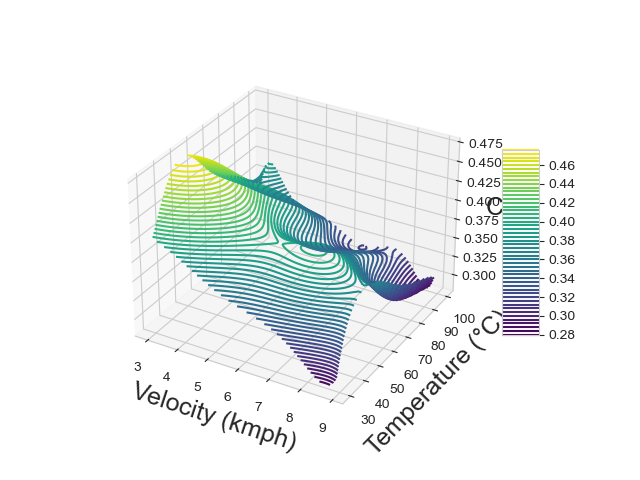

MovieWriter imagemagick unavailable; using Pillow instead.


Making animation


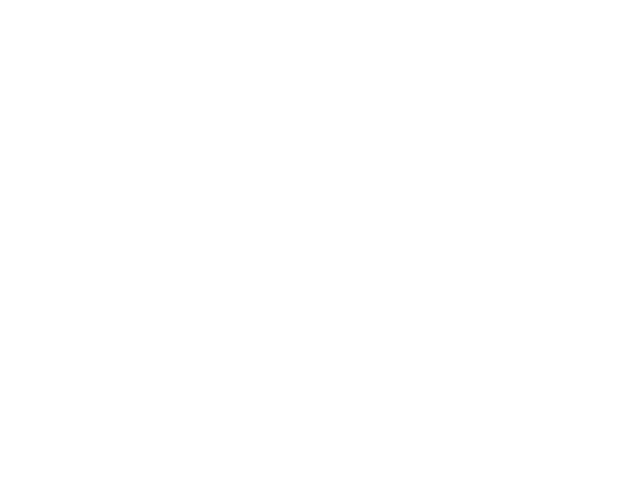

In [164]:
from matplotlib import cm


# for creating a responsive plot
%matplotlib widget

plt.clf()
fig = plt.figure()
ax = plt.axes(projection='3d')
cont = ax.contour3D(x, y, mu_pred.T, 50, cmap= 'viridis')
# ax.plot_surface(x, y, mu_pred.T,cmap='viridis', edgecolor='none')
# ax.plot(xx,yy,mu_1.T, color = 'red' )
# ax.plot(xx,yy1,mu_2.T, color = 'red' )

ax.set_xlabel('Velocity (kmph)',size = 18)
ax.set_ylabel('Temperature (°C)',size = 18)
ax.set_zlabel('COF',size = 18)
# ax.set_title('Coefficient of Friction Contour')
# Add a color bar which maps values to colors.
fig.colorbar(cont, shrink=0.5, aspect=5)

plt.show()

def rotate(angle):
    ax.view_init(azim=angle)
    

import matplotlib.animation as animation
print("Making animation")
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 362, 2), interval=100)
rot_animation.save('rotation_contour.gif', dpi=80, writer='imagemagick')
    

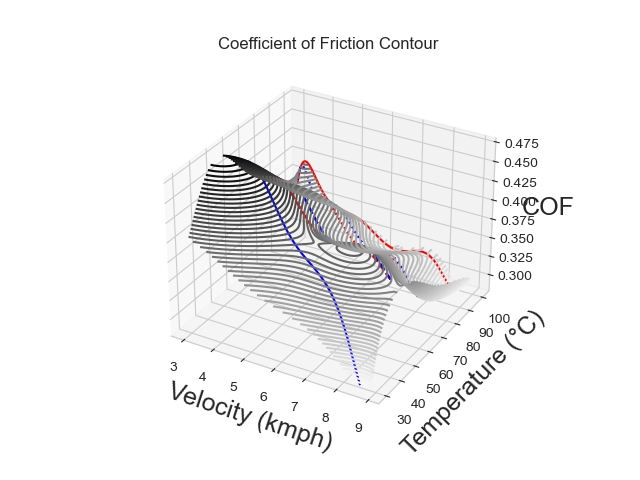

In [166]:
from matplotlib import cm

plt.clf()
# for creating a responsive plot
%matplotlib widget


fig = plt.figure()
ax = plt.axes(projection='3d')
cont = ax.contour3D(x, y, mu_pred.T, 50, cmap= 'binary')
# ax.plot_surface(x, y, mu_pred.T,cmap='viridis', edgecolor='none')
ax.plot(xx,yy,mu_1.T, color = 'red' )
ax.plot(xx,yy1,mu_2.T, color = 'blue' )
ax.plot(xx,yy2,mu_3.T, '--r' )
ax.plot(xx,yy3,mu_4.T, '--b' )
ax.plot(xx,yy2,mu_3.T, '--r' )
ax.plot(xx,yy3,mu_4.T, '--b' )
ax.plot(xx,yy4,mu_5.T, ':r' )
ax.plot(xx,yy5,mu_6.T, ':b' )

ax.set_xlabel('Velocity (kmph)',size = 18)
ax.set_ylabel('Temperature (°C)',size = 18)
ax.set_zlabel('COF',size = 18)
ax.set_title('Coefficient of Friction Contour')
# Add a color bar which maps values to colors.
# fig.colorbar(cont, shrink=0.5, aspect=5)

plt.show()


    

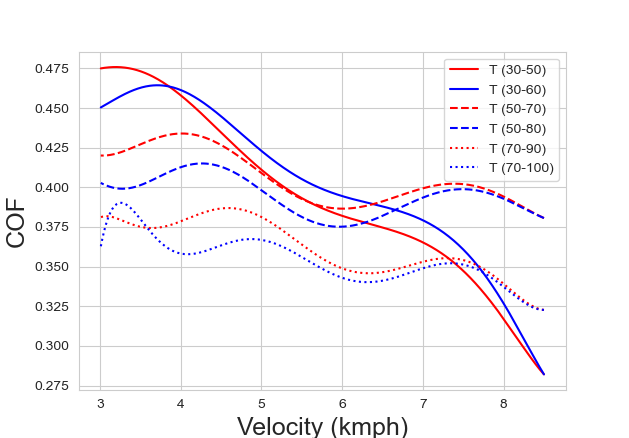

In [105]:
plt.clf()
plt.plot(xx,mu_1.T, "r")
plt.plot(xx,mu_2.T, "b")
plt.plot(xx,mu_3.T, "--r")
plt.plot(xx,mu_4.T, "--b")
plt.plot(xx,mu_5.T, ":r")
plt.plot(xx,mu_6.T, ":b")
plt.xlabel('Velocity (kmph)', size = 18)
plt.ylabel('COF', size = 18)
plt.legend(['T (30-50)','T (30-60)','T (50-70)','T (50-80)','T (70-90)','T (70-100)'])
plt.show()

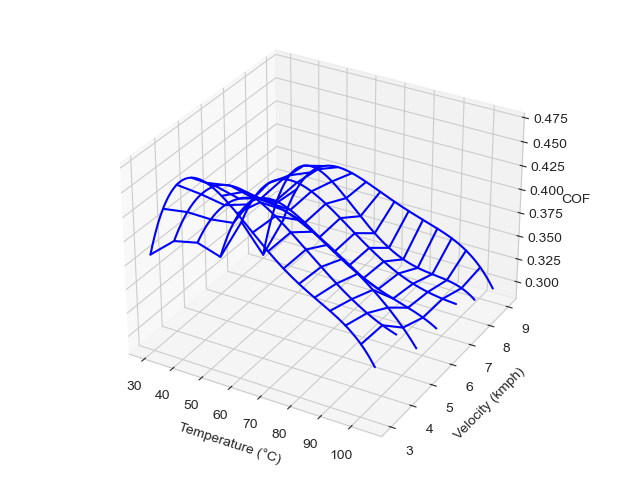

In [165]:
import matplotlib.pylab as pl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# for creating a responsive plot
%matplotlib widget

pl.figure()

ax = pl.subplot(projection='3d')

for i in np.arange(0,len(d),1):
    
  
    ax.plot(temp,np.ones(temp.size)*vel[i],d[lst[i]]['mu'], color = "blue")
    
for i in np.arange(0,len(d2),1):
    

    ax.plot(np.ones(len(vel))*tmp[i],vel,d2[tmp[i]]['mu'], color = "blue")
    
    
    ax.set_xlabel('Temperature (°C)')
    ax.set_ylabel('Velocity (kmph)')
    ax.set_zlabel('COF')
   

    
pl.tight_layout()
pl.show()
    

# Change COF graph

In [110]:
tem = np.arange(30,105,5)

In [112]:
vel

[3, 4, 5, 6, 7, 8, 9]

In [113]:
for i in np.arange(0,len(tem)-1,1):
    
    xval = (vel[-1],tem[i])
    poly_x_values = poly_model.fit_transform(x_val)
    mu_11 = regression_model.predict(poly_x_values)
    
    xval = (vel[0],tem[i+1])
    poly_x_values = poly_model.fit_transform(x_val)
    mu_22 = regression_model.predict(poly_x_values)
    
    dmu = mu_22 - mu_11
    print(dmu)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
dmu = []

In [139]:
for i in np.arange(0,len(tem)-1,1):

    xx = np.arange(8.5,3,-0.01)
    yy = np.linspace(tem[i],tem[i+1],len(xx))


    x_val = np.stack((xx,yy), axis = 1)

    poly_x_values = poly_model.fit_transform(x_val)
    mu_1 = regression_model.predict(poly_x_values)

    dum = mu_1[-1]-mu_1[0]
    dmu = np.append(dmu,dum)

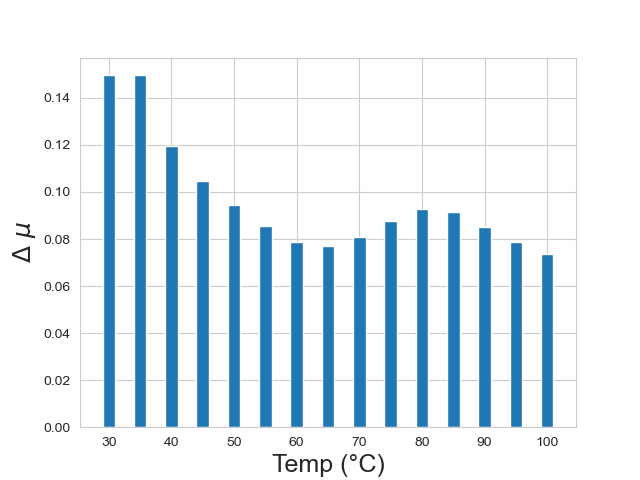

In [163]:
plt.clf()
plt.bar(tem,dmu,width = 2)
plt.ylabel('$\Delta \ \mu$', size = 18)
plt.xlabel('Temp (°C)', size = 18)
plt.show()

In [148]:
len(tem)

15

In [149]:
len(dmu)

15